# <center> **Consumer Behavior and Shopping Habits Research**

---

# <center> *Let's begin!*

---

## Import libraries

In [86]:
import numpy as np
import pandas as pd

import functions as funcs

import matplotlib.pyplot as plt
import seaborn as sb 

from sklearn import preprocessing as pp
from sklearn import model_selection as ms 
from sklearn import linear_model as lm
from sklearn import tree as t 
from sklearn import ensemble as ens 
from sklearn import cluster as c 
from sklearn import metrics as m
from sklearn import pipeline as pl
from sklearn import mixture as mx 

import xgboost as xgb  

plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

import pickle

RS = 95

## Read Data

In [2]:
data = pd.read_csv('data/shopping_behavior_updated.csv')

data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


## Basic Information

In [3]:
funcs.get_data_info(data) 

,Nulls,Uniques,Dtypes
Customer ID,0.0,3900,int64
Age,0.0,53,int64
Gender,0.0,2,object
Item Purchased,0.0,25,object
Category,0.0,4,object
Purchase Amount (USD),0.0,81,int64
Location,0.0,50,object
Size,0.0,4,object
Color,0.0,25,object
Season,0.0,4,object


In [4]:
data.describe(exclude='object').round(2) 

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.00,3900.00,3900.00,3900.00,3900.00
mean,1950.50,44.07,59.76,3.75,25.35
std,1125.98,15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,1950.50,44.00,60.00,3.70,25.00
75%,2925.25,57.00,81.00,4.40,38.00
max,3900.00,70.00,100.00,5.00,50.00


In [5]:
data.describe(include='object').round(2) 

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


> There are no Null values in our data

In [6]:
data.drop(['Customer ID', 
           'Discount Applied'], 
          axis=1, 
          inplace=True)

data.shape

(3900, 16)

----

# <center> *Here comes the EDA*

I will research this data in the context of `Frequency of Purchases`, because this feature speaks about consumers behavior directly.

---

## Numeric data

In [7]:
def show_mean_freq(feat, data=data):
    mean_data = (data
                 .groupby('Frequency of Purchases')
                 [feat]
                 .mean())
    
    if data[feat].dtype == float:
        m_val = int(mean_data.mean()) + 0.5
    else:
        m_val = int(mean_data.mean() / 10) * 10
    
    mean_data -= m_val
    
    fig, ax = plt.subplots(2, 1, figsize=(12, 10))
    
    sb.kdeplot(data, 
               x=feat, 
               hue='Frequency of Purchases', 
               multiple='fill', 
               bw_adjust=0.4,
               ax=ax[0])
    sb.barplot(mean_data, palette='muted', ax=ax[1])
    
    ax[0].set_title(f'Normalised distribution of {feat}')
    
    ax[1].set_title(f'Mean {feat} per Frequency of Purchases')
    ax[1].set_ylabel(f'{feat} (+ {m_val})')
    fig.show()
    

for col in data.columns:
    if data[col].dtype != 'object':
        print(col)

Age
Purchase Amount (USD)
Review Rating
Previous Purchases


### *Age*

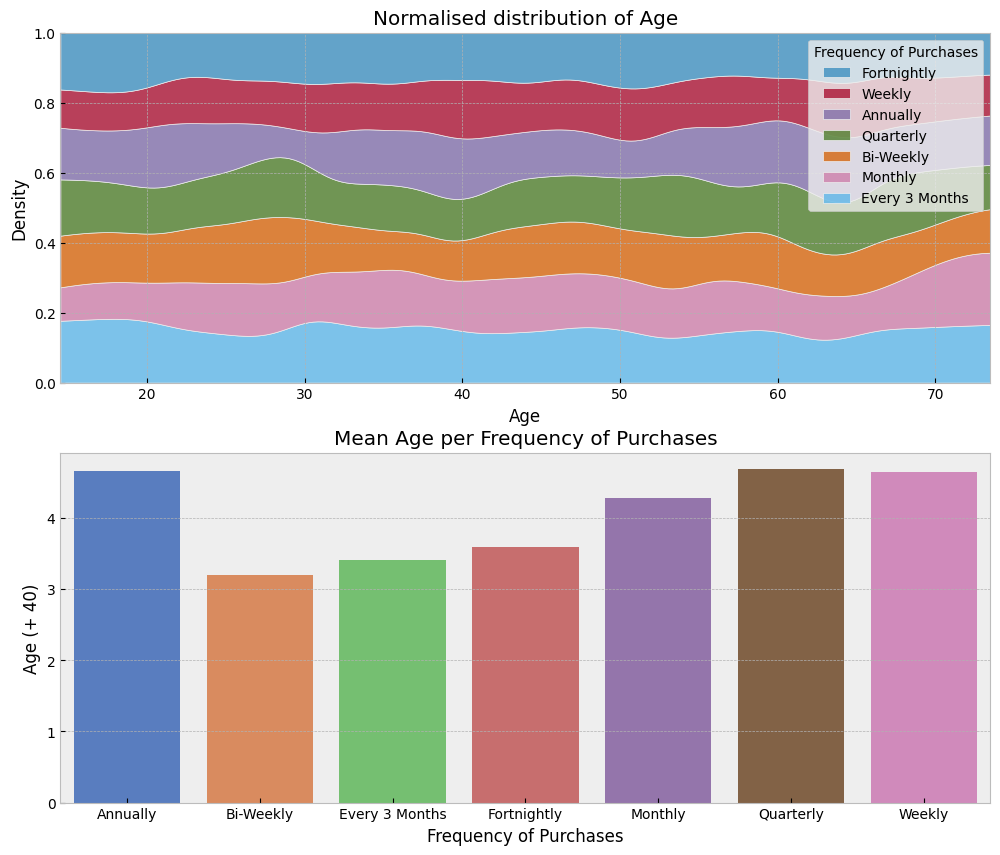

In [8]:
show_mean_freq('Age') 

### *Purchase Amount (USD)*

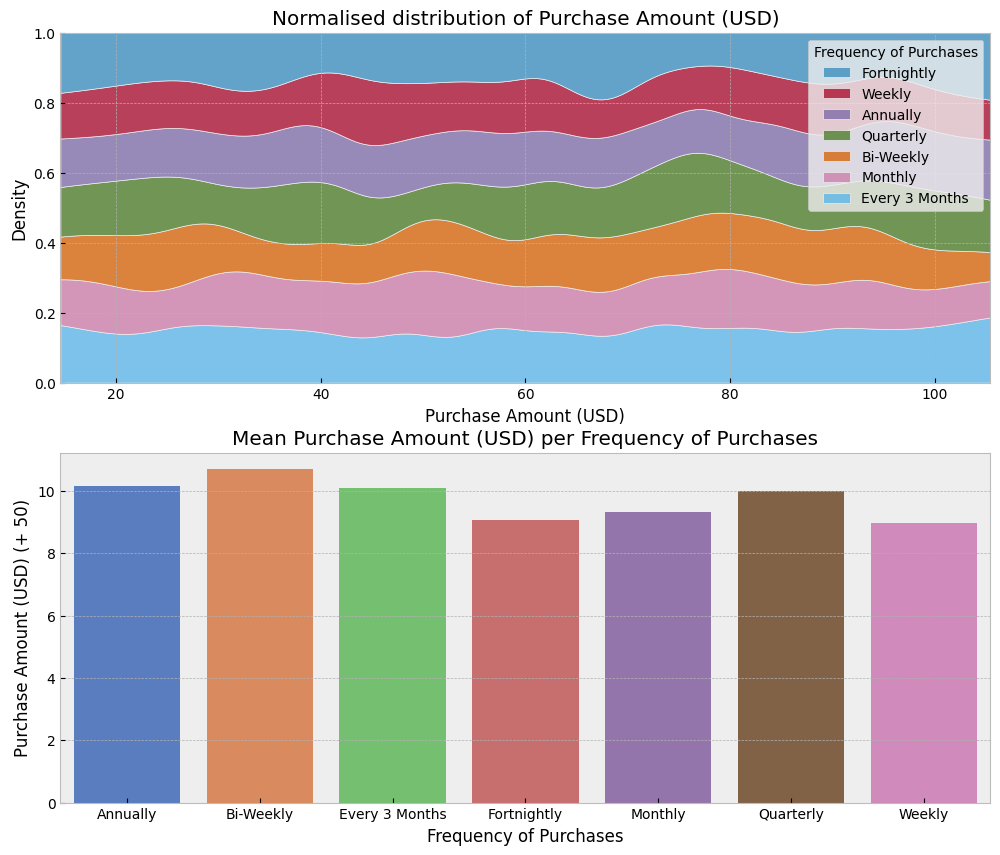

In [9]:
show_mean_freq('Purchase Amount (USD)')

### *Review Rating*

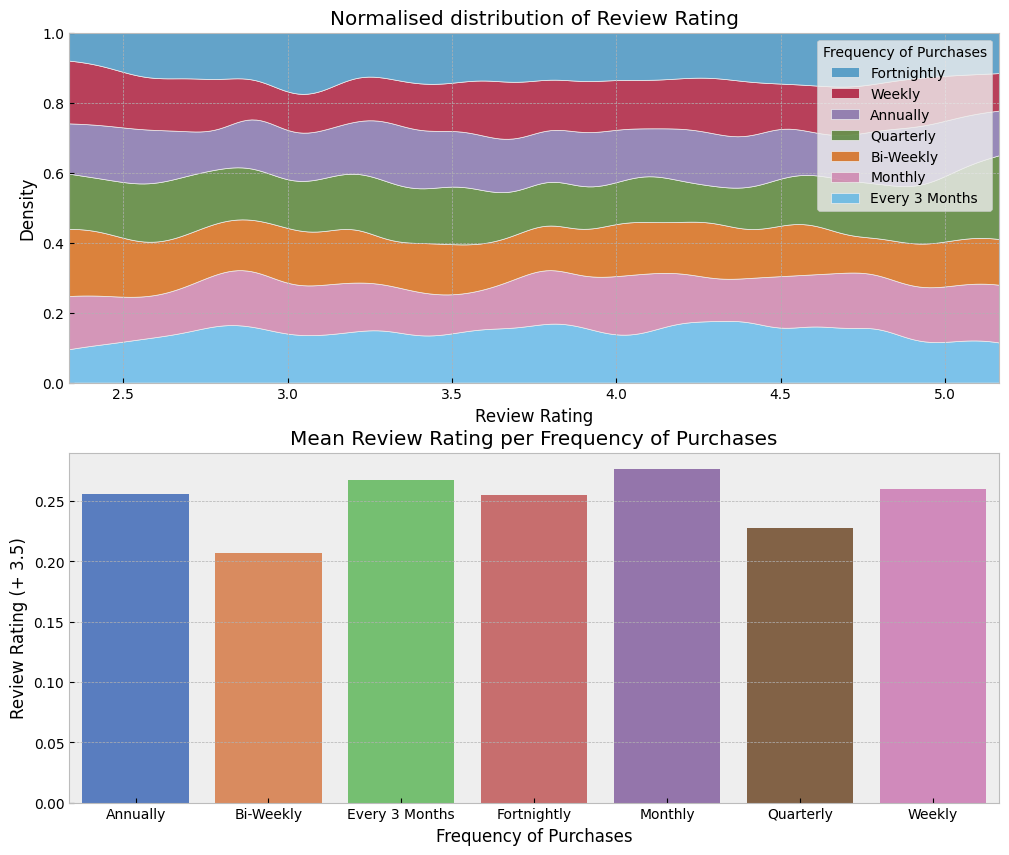

In [10]:
show_mean_freq('Review Rating')

### *Previous Purchases*

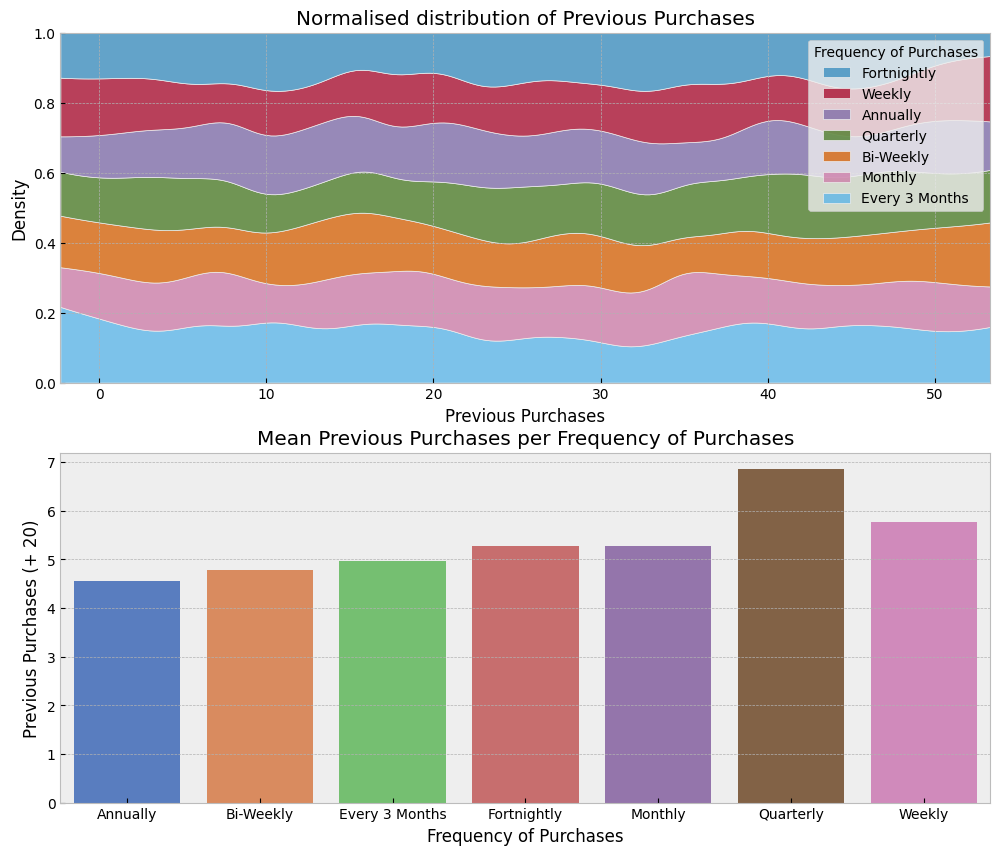

In [11]:
show_mean_freq('Previous Purchases')

> Distribution in all numeric features is **uniform**. 

---

## Categorical data

In [12]:
def get_bayesian_proba(A, 
                       B, 
                       calc_proba, 
                       given_that, 
                       data=data):
    
    ct_data = pd.crosstab(index=data[A], 
                          columns=data[B], 
                          margins=True)
    
    # Conditional probability:
    # p(B|A) = p(B and A) / p(A)
    proba_BA = (ct_data.loc[calc_proba, given_that] 
                / ct_data.loc[calc_proba, 'All'])
    
    # Bayesian probability:
    # p(A|B) = p(A) * p(B|A) / p(B)
    proba_AB = (ct_data.loc[calc_proba, 'All'] 
                * proba_BA 
                / ct_data.loc['All', given_that])
    
    return round(proba_AB, 2)


def show_bayes_bars(X, 
                    y='Frequency of Purchases', 
                    data=data):
    X_vals = data[X].unique()
    y_vals = data[y].unique()
    
    X_list = []
    y_list = []
    probas = []

    for typ in y_vals:
        for val in X_vals:
            X_list.append(val)
            y_list.append(typ)
            
            p = get_bayesian_proba(A=X, 
                                   B=y, 
                                   calc_proba=val, 
                                   given_that=typ)
            probas.append(p)
            
    bayes_data = pd.DataFrame({X: X_list, 
                               y: y_list, 
                               'Probability': probas})
    
    plt.figure(figsize=(len(y_vals)*2, 5))
    sb.barplot(bayes_data, 
               x=y, 
               y='Probability', 
               hue=X)
    
    plt.title(f'Probability of {X} when {y} is given')
    plt.show()
    

for col in data.columns:
    if data[col].nunique() <= 10:
        print(col)

Gender
Category
Size
Season
Subscription Status
Shipping Type
Promo Code Used
Payment Method
Frequency of Purchases


### *Gender*

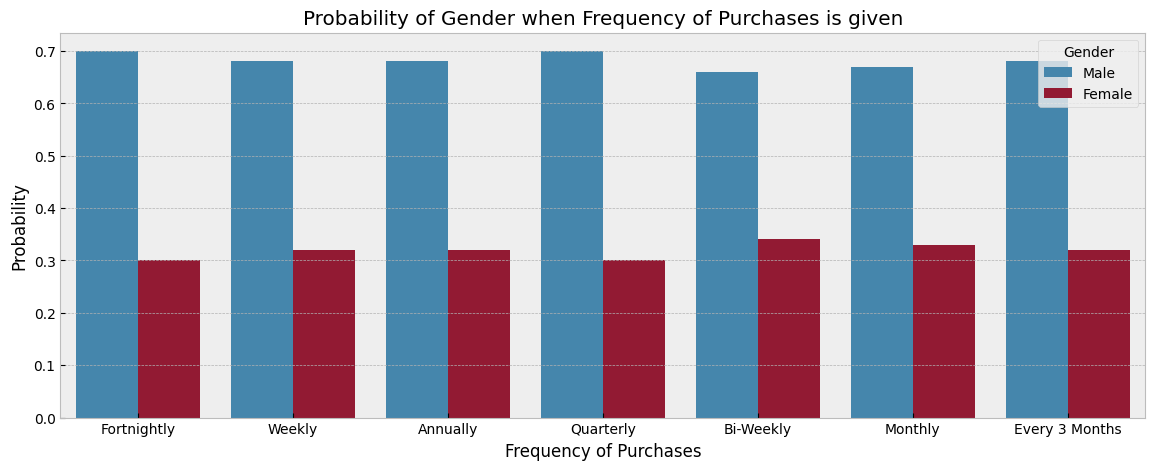

In [13]:
show_bayes_bars('Gender') 

### *Category*

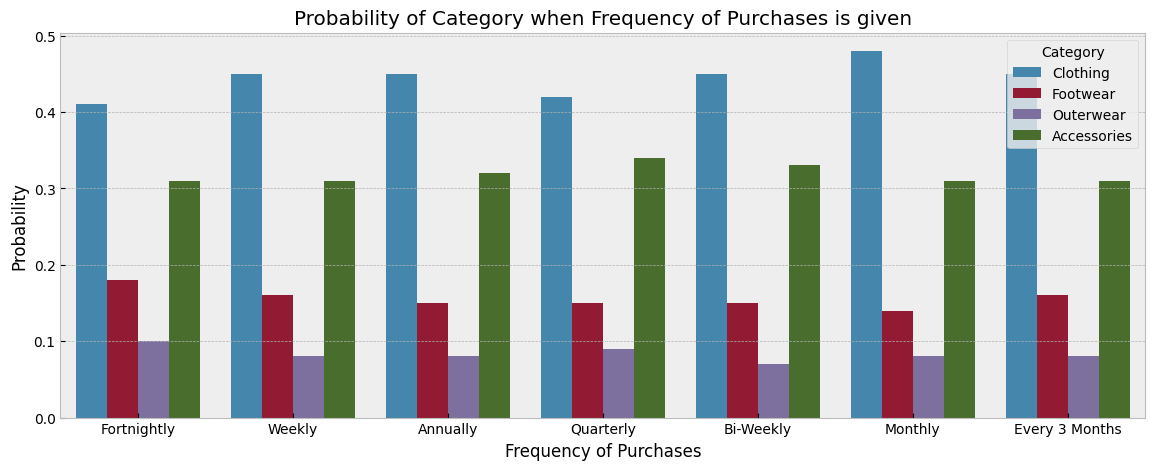

In [14]:
show_bayes_bars('Category')

### *Size*

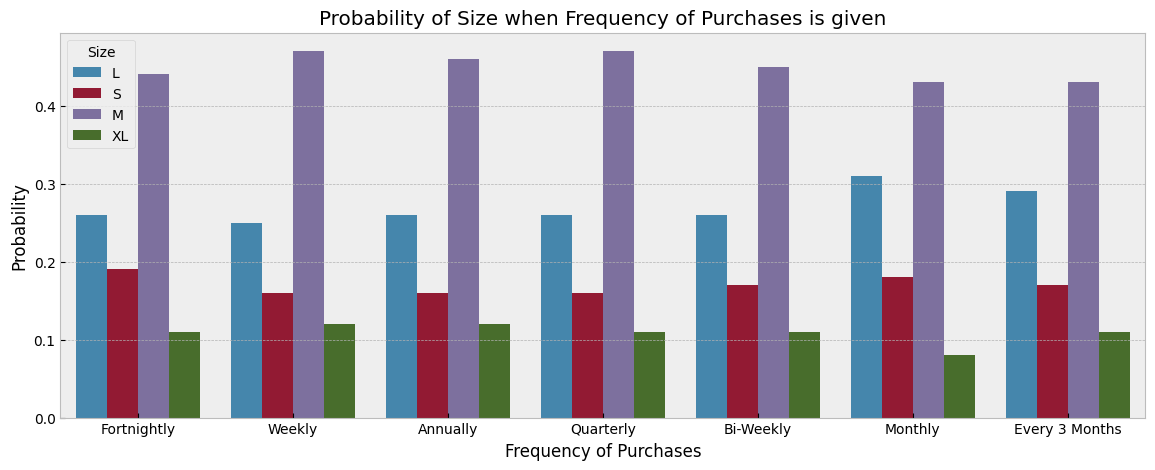

In [15]:
show_bayes_bars('Size')

### *Season*

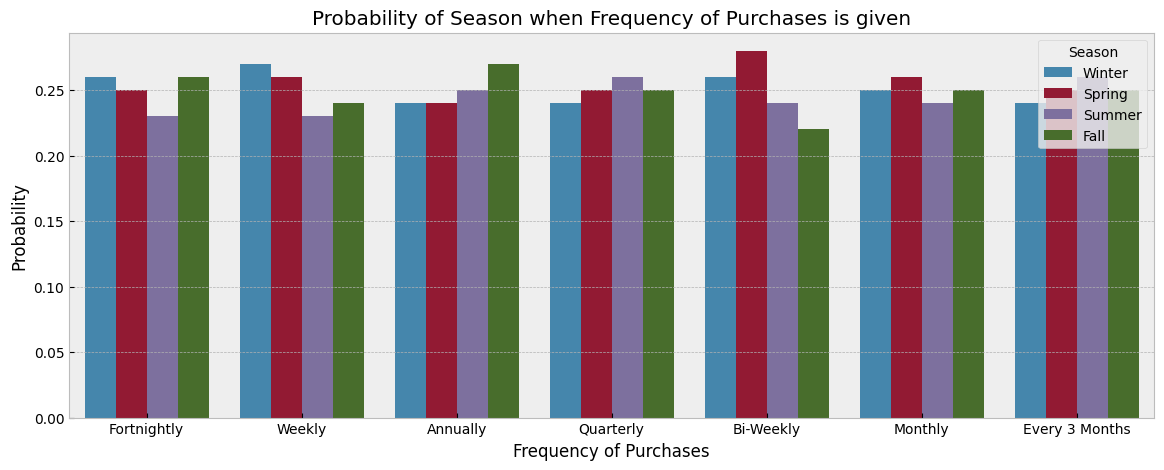

In [16]:
show_bayes_bars('Season')

### *Subscription Status*

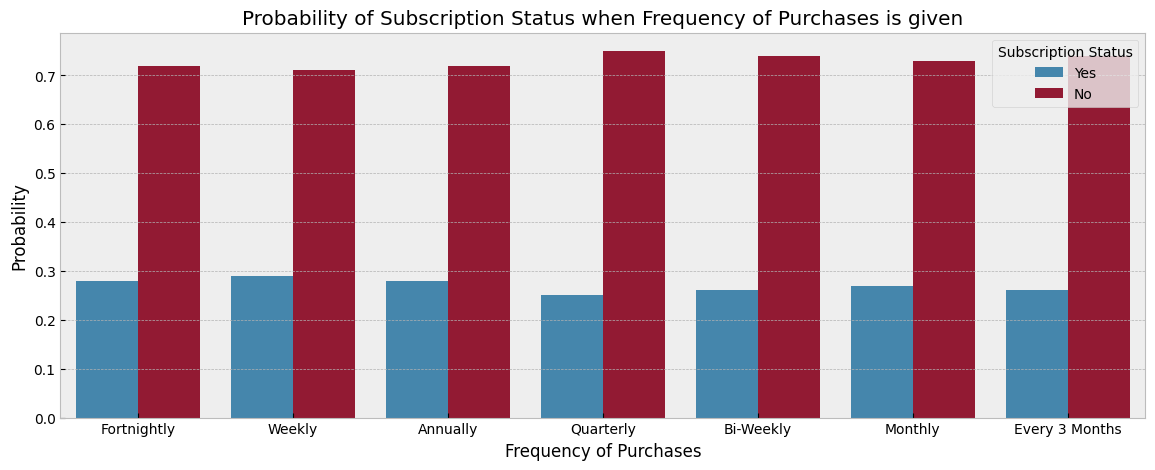

In [17]:
show_bayes_bars('Subscription Status')

### *Shipping Type*

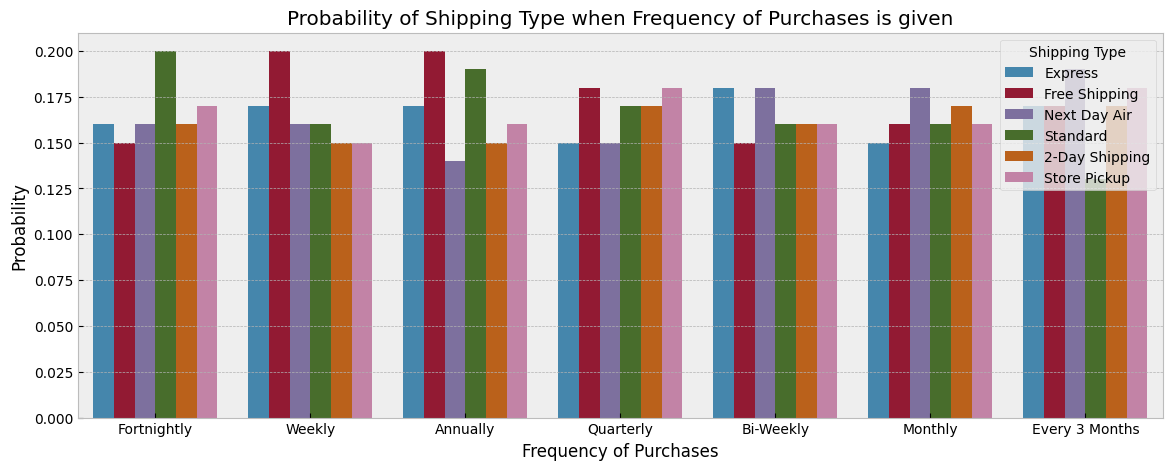

In [18]:
show_bayes_bars('Shipping Type') 

### *Promo Code Used*

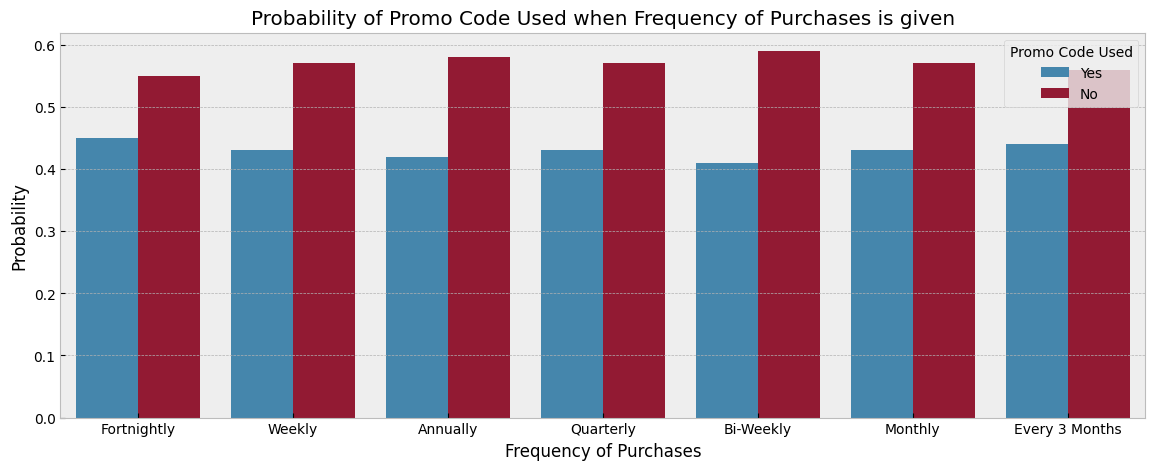

In [19]:
show_bayes_bars('Promo Code Used')

### *Payment Method*

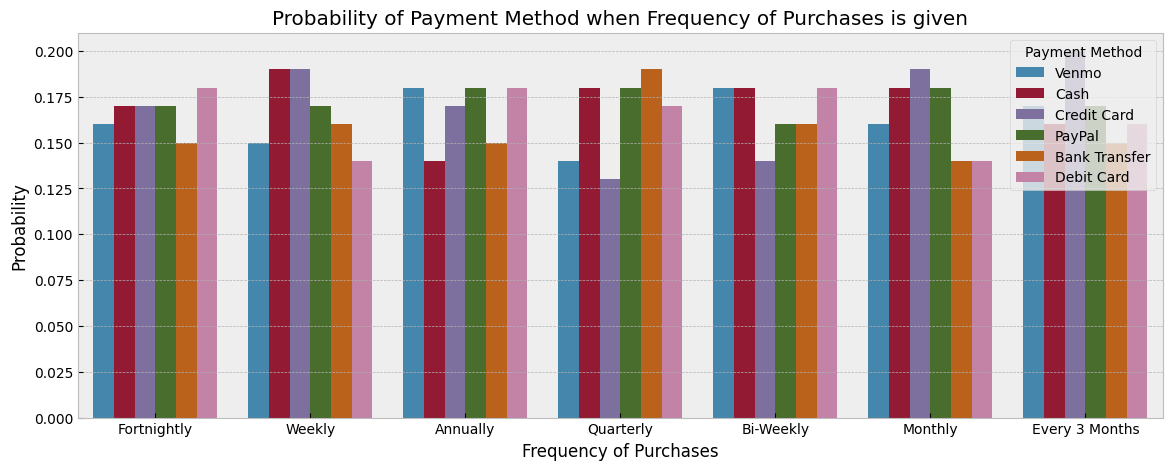

In [20]:
show_bayes_bars('Payment Method')

---

## Other type data

In [21]:
for col in data.columns:
    if ((data[col].nunique() > 10) and 
        (data[col].dtype == 'object')):
        
        print(col) 

Item Purchased
Location
Color


### *Item Purchased*

In [22]:
data['Item Purchased'].value_counts()

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

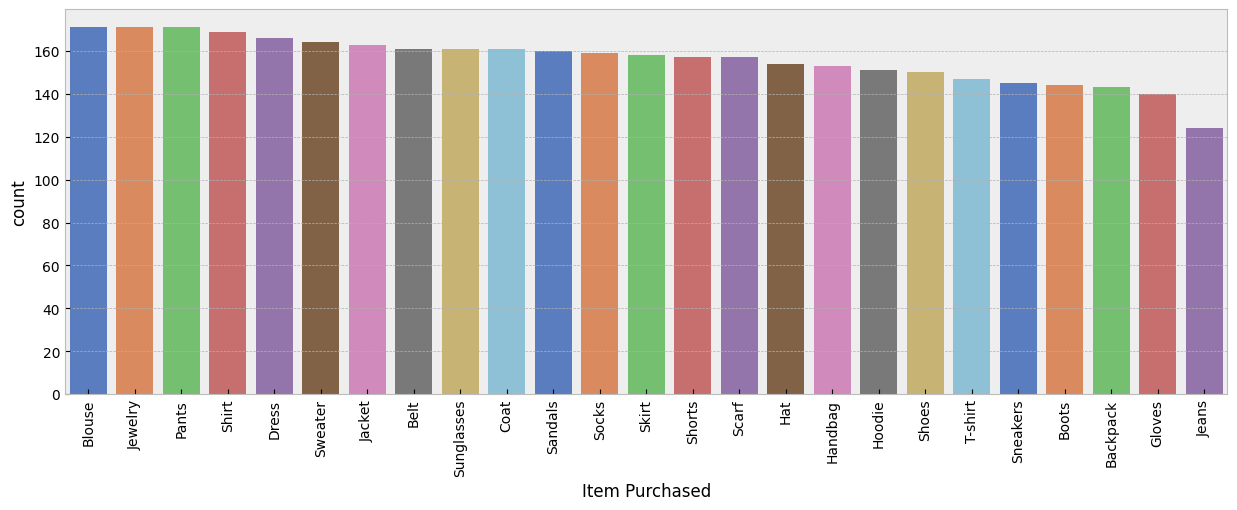

In [23]:
items_vc = data['Item Purchased'].value_counts()

plt.figure(figsize=(15, 5))
sb.barplot(items_vc, palette='muted')

plt.xticks(rotation='vertical')
plt.show()

### *Location*

In [24]:
data['Location'].value_counts().index

Index(['Montana', 'California', 'Idaho', 'Illinois', 'Alabama', 'Minnesota',
       'Nebraska', 'New York', 'Nevada', 'Maryland', 'Delaware', 'Vermont',
       'Louisiana', 'North Dakota', 'Missouri', 'West Virginia', 'New Mexico',
       'Mississippi', 'Indiana', 'Georgia', 'Kentucky', 'Arkansas',
       'North Carolina', 'Connecticut', 'Virginia', 'Ohio', 'Tennessee',
       'Texas', 'Maine', 'South Carolina', 'Colorado', 'Oklahoma', 'Wisconsin',
       'Oregon', 'Pennsylvania', 'Washington', 'Michigan', 'Alaska',
       'Massachusetts', 'Wyoming', 'Utah', 'New Hampshire', 'South Dakota',
       'Iowa', 'Florida', 'New Jersey', 'Hawaii', 'Arizona', 'Kansas',
       'Rhode Island'],
      dtype='object', name='Location')

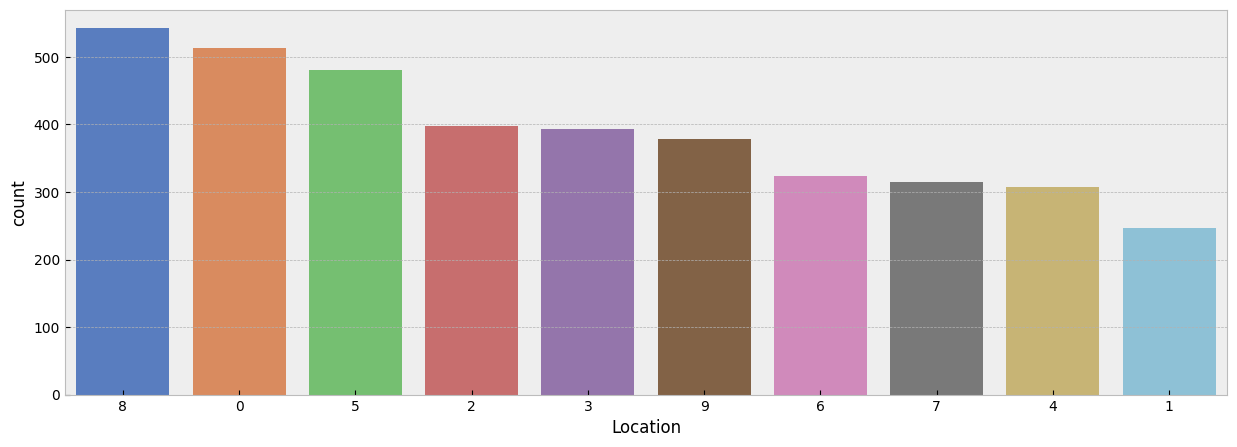

In [25]:
def change_location(x):
    zones = {'0': ['New Jersey', 'Connecticut', 'Rhode Island', 'Massachusetts', 'New Hampshire', 'Vermont', 'Maine'], 
             '1': ['Delaware', 'Pennsylvania', 'New York'], 
             '2': ['Maryland', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina'], 
             '3': ['Mississippi', 'Tennessee', 'Alabama', 'Georgia', 'Florida'], 
             '4': ['Michigan', 'Indiana', 'Ohio', 'Kentucky'], 
             '5': ['Montana', 'North Dakota', 'South Dakota', 'Minnesota', 'Iowa', 'Wisconsin'], 
             '6': ['Nebraska', 'Kansas', 'Missouri', 'Illinois'], 
             '7': ['Texas', 'Oklahoma', 'Arkansas', 'Louisiana'], 
             '8': ['Idaho', 'Wyoming', 'Utah', 'Nevada', 'Colorado', 'Arizona', 'New Mexico'], 
             '9': ['Washington', 'Oregon', 'California', 'Alaska', 'Hawaii']}
    
    for k, v in zones.items():
        if x in v:
            x = k
    
    return x


locs_vc = (data['Location']
           .apply(change_location)
           .value_counts())

plt.figure(figsize=(15, 5))
sb.barplot(locs_vc, palette='muted')

plt.show()

### *Color*

In [26]:
data['Color'].value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

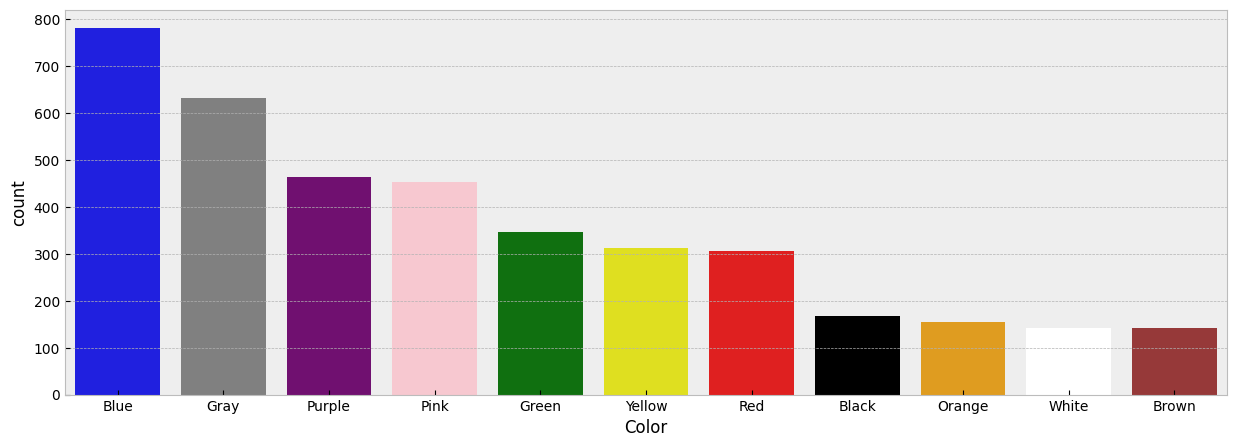

In [27]:
def change_color(x):
    colors = {'Red': ['Maroon'], 
              'Yellow': ['Gold'], 
              'Green': ['Olive'], 
              'Blue': ['Teal', 'Cyan', 'Indigo', 'Turquoise'],
              'Purple': ['Violet', 'Lavender'], 
              'Pink': ['Magenta', 'Peach'], 
              'Gray': ['Silver', 'Charcoal', 'Beige']}
    
    for k, v in colors.items():
        if x in v:
            x = k
    
    return x


colors_vc = (data['Color']
             .apply(change_color)
             .value_counts())

c_palette = (colors_vc
             .index
             .tolist())

plt.figure(figsize=(15, 5))
sb.barplot(colors_vc, palette=c_palette)

plt.show()

---

# <center> *Data Processing & Modeling*

In [28]:
def X_y_split(target, data=data): 
    X = data.drop(target, axis=1)
    y = data[target]
    
    return X, y 


def trains_tests_split(X, y):    
    X_train, X_test, y_train, y_test = \
        ms.train_test_split(X, y, 
                            random_state=RS, 
                            test_size=0.2)
    
    print(f'Train sample counts {X_train.shape[0]} rows')
    print(f'Test sample counts {X_test.shape[0]} rows')
    
    return X_train, X_test, y_train, y_test


def transform_X(X, transformer):
    X_ = transformer.fit_transform(X)
    
    return pd.DataFrame(X_, columns=X.columns)


def dump_model(model, task_dir, f_name):
    with open(f'app/models/{task_dir}/{f_name}.pkl', 'wb') as m_file:
        pickle.dump(model, m_file)
        
    print(f'{model} is saved into "{task_dir}".')
    
    
reg_dir = 'purchase_amount'
clf_dir = 'subscription_status'
mcc_dir = 'frequency_of_purchases'

---

## Regression task

In [29]:
X, y = X_y_split('Purchase Amount (USD)')

X.head()

,Age,Gender,Item Purchased,Category,Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually


### *Encoding*

In [30]:
encoder = pp.OrdinalEncoder()
X = transform_X(X, encoder)

X.head()

,Age,Gender,Item Purchased,Category,Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,37.0,1.0,2.0,1.0,16.0,0.0,7.0,3.0,6.0,1.0,1.0,1.0,13.0,5.0,3.0
1,1.0,1.0,23.0,1.0,18.0,0.0,12.0,3.0,6.0,1.0,1.0,1.0,1.0,1.0,3.0
2,32.0,1.0,11.0,1.0,20.0,2.0,12.0,1.0,6.0,1.0,2.0,1.0,22.0,2.0,6.0
3,3.0,1.0,14.0,2.0,38.0,1.0,12.0,1.0,10.0,1.0,3.0,1.0,48.0,4.0,6.0
4,27.0,1.0,2.0,1.0,36.0,1.0,21.0,1.0,2.0,1.0,2.0,1.0,30.0,4.0,0.0


In [31]:
dump_model(encoder, reg_dir, 'reg_encoder') 

OrdinalEncoder() is saved into "purchase_amount".


### *Scaling*

In [32]:
scaler = pp.MinMaxScaler()
X = transform_X(X, scaler)

X.head()

,Age,Gender,Item Purchased,Category,Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,0.711538,1.0,0.083333,0.333333,0.326531,0.000000,0.291667,1.000000,0.24,1.0,0.2,1.0,0.265306,1.0,0.5
1,0.019231,1.0,0.958333,0.333333,0.367347,0.000000,0.500000,1.000000,0.24,1.0,0.2,1.0,0.020408,0.2,0.5
2,0.615385,1.0,0.458333,0.333333,0.408163,0.666667,0.500000,0.333333,0.24,1.0,0.4,1.0,0.448980,0.4,1.0
3,0.057692,1.0,0.583333,0.666667,0.775510,0.333333,0.500000,0.333333,0.40,1.0,0.6,1.0,0.979592,0.8,1.0
4,0.519231,1.0,0.083333,0.333333,0.734694,0.333333,0.875000,0.333333,0.08,1.0,0.4,1.0,0.612245,0.8,0.0


In [33]:
dump_model(scaler, reg_dir, 'reg_scaler')

MinMaxScaler() is saved into "purchase_amount".


### **Correlation analysis*

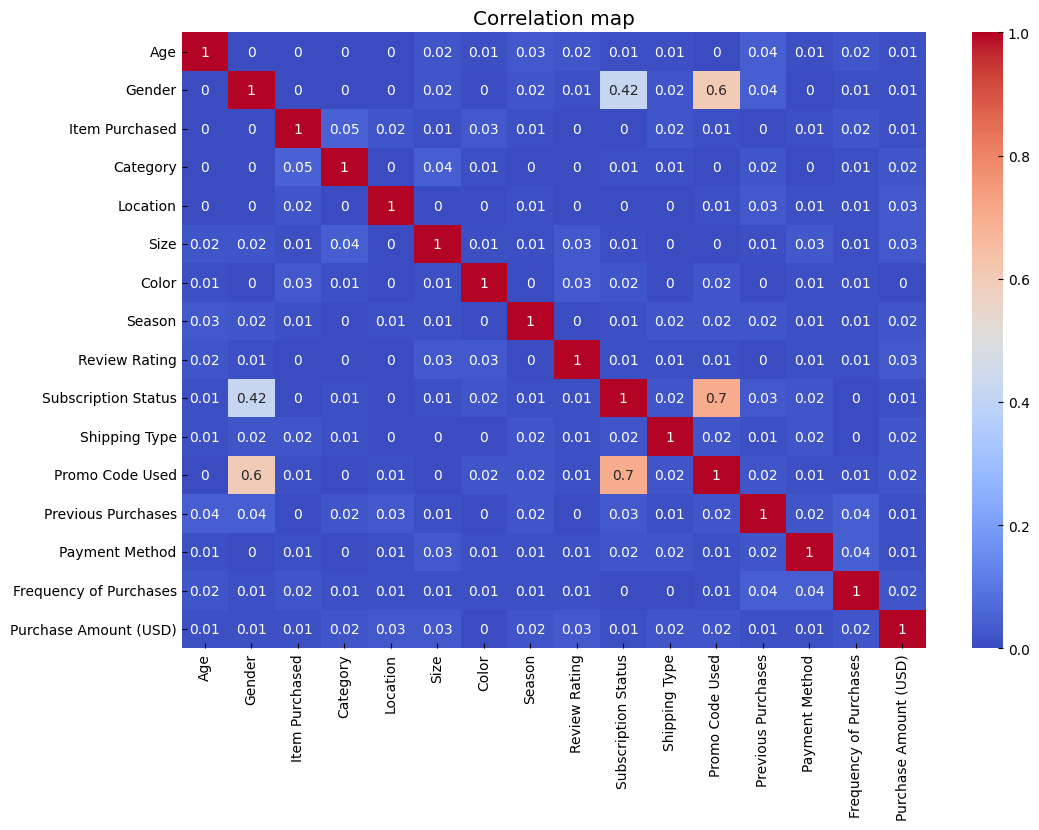

In [34]:
corr_data = (pd.concat([X, y], axis=1)
             .corr()
             .abs()
             .round(2))

plt.figure(figsize=(12, 8))
sb.heatmap(corr_data, 
           annot=True, 
           cmap='coolwarm')

plt.title('Correlation map')
plt.show()

### *Linear Regression (baseline)*

In [35]:
X_train, X_test, y_train, y_test = trains_tests_split(X, y) 

Train sample counts 3120 rows
Test sample counts 780 rows


In [36]:
def print_scores(train, test):
    print(f'Train score: {train.round(2)}')
    print(f'Test score: {test.round(2)}\n')
    print(f'Difference is {np.abs(train-test).round(2)}')


def get_model_scores(model, 
                     scoring, 
                     X_train=X_train, 
                     X_test=X_test, 
                     y_train=y_train, 
                     y_test=y_test):
    
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_score = scoring(y_train, y_pred_train)
    test_score = scoring(y_test, y_pred_test)
    
    print_scores(train_score, test_score)
    
    
get_regression_scores = lambda model: get_model_scores(model, m.mean_absolute_percentage_error)

In [37]:
def gridsearch_opt(model, params, scoring):
    search = ms.RandomizedSearchCV(model, 
                                   params, 
                                   scoring=scoring, 
                                   cv=10, 
                                   random_state=RS,
                                   n_jobs=-1)
    
    search.fit(X_train, y_train)
    
    train_score = search.score(X_train, y_train)
    test_score = search.score(X_test, y_test)

    print_scores(train_score, test_score)
    
    return search.best_params_
    

gs_opt_regression = lambda model, params: gridsearch_opt(model, 
                                                         params=params, 
                                                         scoring='neg_mean_absolute_percentage_error')

In [38]:
base_reg = lm.LinearRegression(n_jobs=-1)

get_regression_scores(base_reg)

Train score: 0.46
Test score: 0.46

Difference is 0.0


In [39]:
pf = pp.PolynomialFeatures(degree=2)

X_train_poly = pf.fit_transform(X_train, y_train)
X_test_poly = pf.fit_transform(X_test, y_train)

feats_diff = X_train_poly.shape[1] - X_train.shape[1]
print(f'Number of polynomial features is {feats_diff}.\n')

get_model_scores(lm.LinearRegression(n_jobs=-1), 
                 m.mean_absolute_percentage_error, 
                 X_train=X_train_poly, 
                 X_test=X_test_poly)

Number of polynomial features is 121.

Train score: 0.45
Test score: 0.46

Difference is 0.02


### *Stochastic Gradient Descend*

In [40]:
sgd_reg = lm.SGDRegressor(random_state=RS)

get_regression_scores(sgd_reg)

Train score: 0.46
Test score: 0.46

Difference is 0.0


In [41]:
sgd_params = {
    
}

### *Decision Tree*

In [42]:
dt_reg = t.DecisionTreeRegressor(random_state=RS)

get_regression_scores(dt_reg)

Train score: 0.0
Test score: 0.57

Difference is 0.57


In [43]:
dt_params = {'max_depth': [3, 4, 5, 6], 
             'min_samples_leaf': [1, 2, 3, 4]}

gs_opt_regression(dt_reg, dt_params)

Train score: -0.46
Test score: -0.46

Difference is 0.0


{'min_samples_leaf': 1, 'max_depth': 3}

### *Random Forest*

In [44]:
rf_reg = ens.RandomForestRegressor(random_state=RS, n_jobs=-1)

get_regression_scores(rf_reg)

Train score: 0.17
Test score: 0.46

Difference is 0.29


In [45]:
rf_params = {'n_estimators': [100, 200, 300], 
             'max_depth': [3, 4, 5]}

gs_opt_regression(rf_reg, rf_params)

Train score: -0.46
Test score: -0.46

Difference is 0.0


{'n_estimators': 100, 'max_depth': 3}

### *Subtotal (regression)*

I think, there is no point to use more complex models, because they don't show greater efficienсy, and MAPE score is already pretty good even on the baseline.

In [46]:
show_coefs = lambda model, X=X: pd.DataFrame(model.coef_.reshape((1, 15)), 
                                             index=['w'], 
                                             columns=X.columns) 
    

show_coefs(base_reg)

,Age,Gender,Item Purchased,Category,Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
w,-1.293717,-0.345027,-0.130097,-1.334134,1.912351,1.680375,-0.102477,-1.010047,3.357556,0.233123,-1.692938,-0.002248,2.099301,-0.465457,-0.781274


In [47]:
dump_model(base_reg, reg_dir, 'reg_model') 

LinearRegression(n_jobs=-1) is saved into "purchase_amount".


---

## Classification task

In [48]:
X, y = X_y_split('Subscription Status')

X.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Express,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Express,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Free Shipping,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Next Day Air,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Free Shipping,Yes,31,PayPal,Annually


### *Encoding*

In [49]:
encoder = pp.OrdinalEncoder()
X = transform_X(X, encoder)

X.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,37.0,1.0,2.0,1.0,33.0,16.0,0.0,7.0,3.0,6.0,1.0,1.0,13.0,5.0,3.0
1,1.0,1.0,23.0,1.0,44.0,18.0,0.0,12.0,3.0,6.0,1.0,1.0,1.0,1.0,3.0
2,32.0,1.0,11.0,1.0,53.0,20.0,2.0,12.0,1.0,6.0,2.0,1.0,22.0,2.0,6.0
3,3.0,1.0,14.0,2.0,70.0,38.0,1.0,12.0,1.0,10.0,3.0,1.0,48.0,4.0,6.0
4,27.0,1.0,2.0,1.0,29.0,36.0,1.0,21.0,1.0,2.0,2.0,1.0,30.0,4.0,0.0


In [50]:
y = y.apply(lambda x: 1 if x == 'Yes' else 0)

y

0       1
1       1
2       1
3       1
4       1
       ..
3895    0
3896    0
3897    0
3898    0
3899    0
Name: Subscription Status, Length: 3900, dtype: int64

In [51]:
dump_model(encoder, clf_dir, 'clf_encoder')

OrdinalEncoder() is saved into "subscription_status".


### *Scaling*

In [52]:
scaler = pp.MinMaxScaler()
X = transform_X(X, scaler)

X.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,0.711538,1.0,0.083333,0.333333,0.4125,0.326531,0.000000,0.291667,1.000000,0.24,0.2,1.0,0.265306,1.0,0.5
1,0.019231,1.0,0.958333,0.333333,0.5500,0.367347,0.000000,0.500000,1.000000,0.24,0.2,1.0,0.020408,0.2,0.5
2,0.615385,1.0,0.458333,0.333333,0.6625,0.408163,0.666667,0.500000,0.333333,0.24,0.4,1.0,0.448980,0.4,1.0
3,0.057692,1.0,0.583333,0.666667,0.8750,0.775510,0.333333,0.500000,0.333333,0.40,0.6,1.0,0.979592,0.8,1.0
4,0.519231,1.0,0.083333,0.333333,0.3625,0.734694,0.333333,0.875000,0.333333,0.08,0.4,1.0,0.612245,0.8,0.0


In [53]:
dump_model(scaler, clf_dir, 'clf_scaler')

MinMaxScaler() is saved into "subscription_status".


### *Logistic Regression (baseline)*

In [54]:
X_train, X_test, y_train, y_test = trains_tests_split(X, y) 

Train sample counts 3120 rows
Test sample counts 780 rows


In [55]:
get_classification_score = lambda model: get_model_scores(model, 
                                                          m.accuracy_score, 
                                                          X_train=X_train, 
                                                          X_test=X_test, 
                                                          y_train=y_train, 
                                                          y_test=y_test)

gs_opt_classification = lambda model, params: gridsearch_opt(model, 
                                                             params=params, 
                                                             scoring='accuracy')

In [56]:
base_clf = lm.LogisticRegression(random_state=RS, n_jobs=-1)

get_classification_score(base_clf)

Train score: 0.84
Test score: 0.83

Difference is 0.01


### *Stochastic Gradient Descend*

In [57]:
sgd_clf = lm.SGDClassifier(random_state=RS, n_jobs=-1)

get_classification_score(sgd_clf)

Train score: 0.84
Test score: 0.83

Difference is 0.01


In [58]:
sgd_params = {'loss': ['hinge', 'log_loss', 'perceptron', 'huber'], 
              'alpha': np.linspace(1e-6, 10, 20), 
              'tol': np.linspace(1e-6, 10, 20)}

gs_opt_classification(sgd_clf, sgd_params)

Train score: 0.76
Test score: 0.76

Difference is 0.0


{'tol': 6.842105578947369, 'loss': 'perceptron', 'alpha': 4.736842631578948}

### *Decision Tree*

In [59]:
dt_clf = t.DecisionTreeClassifier(random_state=RS)

get_classification_score(dt_clf)

Train score: 1.0
Test score: 0.79

Difference is 0.21


In [60]:
dt_params = {'criterion': ['gini', 'entropy', 'log_loss'],
             'max_depth': [3, 4, 5, 6], 
             'min_samples_leaf': [1, 2, 3, 4]}

gs_opt_classification(dt_clf, dt_params)

Train score: 0.85
Test score: 0.82

Difference is 0.03


{'min_samples_leaf': 1, 'max_depth': 3, 'criterion': 'entropy'}

### *Random Forest*

In [61]:
rf_clf = ens.RandomForestClassifier(random_state=RS, n_jobs=-1)

get_classification_score(rf_clf)

Train score: 1.0
Test score: 0.81

Difference is 0.19


In [62]:
rf_params = {'criterion': ['gini', 'entropy', 'log_loss'],
             'n_estimators': [100, 200, 300], 
             'max_depth': [3, 4, 5]}

gs_opt_classification(rf_clf, rf_params)

Train score: 0.86
Test score: 0.83

Difference is 0.03


{'n_estimators': 200, 'max_depth': 5, 'criterion': 'log_loss'}

### *Gradient Boosting*

In [63]:
gb_clf = ens.GradientBoostingClassifier(random_state=RS)

get_classification_score(gb_clf)

Train score: 0.89
Test score: 0.83

Difference is 0.06


In [64]:
gb_params = {'loss': ['log_loss', 'deviance', 'exponential'], 
             'max_depth': [3, 5, 7], 
             'learning_rate': [0.001, 0.1, 1, 3]}

gs_opt_classification(gb_clf, gb_params)

Train score: 0.89
Test score: 0.83

Difference is 0.06


{'max_depth': 3, 'loss': 'log_loss', 'learning_rate': 0.1}

### *XGBoost*

In [65]:
xgb_clf = xgb.XGBClassifier(seed=RS, use_label_encoder=False)

get_classification_score(xgb_clf)

Train score: 1.0
Test score: 0.81

Difference is 0.19


In [66]:
xgbc_params = {'learning_rate': [0.05, 0.1, 0.3], 
               'max_depth': [3, 5, 7, 9], 
               'min_child_weight': [3, 5, 7, 9], 
               'max_delta_step': [3, 5, 7], 
               'sampling_method': ['uniform', 'gradient_based']}

gs_opt_classification(xgb_clf, xgbc_params)

Train score: 0.92
Test score: 0.81

Difference is 0.12


{'sampling_method': 'uniform',
 'min_child_weight': 7,
 'max_depth': 7,
 'max_delta_step': 5,
 'learning_rate': 0.05}

### *Subtotal (classification)*

Once again, more complex models do not lead to greater efficiency. So I will save basic model.

In [67]:
show_coefs(base_clf, X=X)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
w,-0.059692,1.396715,0.115035,0.108338,0.023905,-0.031141,-0.086798,-0.018089,-0.176922,0.151871,-0.033033,5.71386,0.109533,-0.036946,0.005685


In [68]:
dump_model(base_clf, clf_dir, 'clf_model')

LogisticRegression(n_jobs=-1, random_state=95) is saved into "subscription_status".


---

## Clustering task & Multiclass classification 

This is my personal idea - the experimental method to make multiclass classification.

In [69]:
X, y = X_y_split('Frequency of Purchases')

X.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal


### *Encoding*

In [70]:
encoder = pp.OrdinalEncoder()
X = transform_X(X, encoder)

X.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method
0,37.0,1.0,2.0,1.0,33.0,16.0,0.0,7.0,3.0,6.0,1.0,1.0,1.0,13.0,5.0
1,1.0,1.0,23.0,1.0,44.0,18.0,0.0,12.0,3.0,6.0,1.0,1.0,1.0,1.0,1.0
2,32.0,1.0,11.0,1.0,53.0,20.0,2.0,12.0,1.0,6.0,1.0,2.0,1.0,22.0,2.0
3,3.0,1.0,14.0,2.0,70.0,38.0,1.0,12.0,1.0,10.0,1.0,3.0,1.0,48.0,4.0
4,27.0,1.0,2.0,1.0,29.0,36.0,1.0,21.0,1.0,2.0,1.0,2.0,1.0,30.0,4.0


In [71]:
dump_model(encoder, mcc_dir, 'mcc_encoder') 

OrdinalEncoder() is saved into "frequency_of_purchases".


In [72]:
lab_enc = pp.LabelEncoder()
y = lab_enc.fit_transform(y)

y

array([3, 3, 6, ..., 5, 6, 5])

In [73]:
dump_model(lab_enc, mcc_dir, 'y_encoder') 

LabelEncoder() is saved into "frequency_of_purchases".


### *Scaling*

In [74]:
scaler = pp.MinMaxScaler()
X = transform_X(X, scaler)

X.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Promo Code Used,Previous Purchases,Payment Method
0,0.711538,1.0,0.083333,0.333333,0.4125,0.326531,0.000000,0.291667,1.000000,0.24,1.0,0.2,1.0,0.265306,1.0
1,0.019231,1.0,0.958333,0.333333,0.5500,0.367347,0.000000,0.500000,1.000000,0.24,1.0,0.2,1.0,0.020408,0.2
2,0.615385,1.0,0.458333,0.333333,0.6625,0.408163,0.666667,0.500000,0.333333,0.24,1.0,0.4,1.0,0.448980,0.4
3,0.057692,1.0,0.583333,0.666667,0.8750,0.775510,0.333333,0.500000,0.333333,0.40,1.0,0.6,1.0,0.979592,0.8
4,0.519231,1.0,0.083333,0.333333,0.3625,0.734694,0.333333,0.875000,0.333333,0.08,1.0,0.4,1.0,0.612245,0.8


In [75]:
dump_model(scaler, mcc_dir, 'mcc_scaler')

MinMaxScaler() is saved into "frequency_of_purchases".


---

### <center> **MY IDEA**

The fact is that standard `sklearn.multiclass` methods are not so efficient. For example `OneVsRestClassifier` shows **too low** `accuracy` scores on train and test samples both. 

In [147]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, 
                                                       random_state=RS, 
                                                       test_size=0.2, 
                                                       stratify=y) 

In [155]:
from sklearn.multiclass import OneVsRestClassifier

ovr_model = OneVsRestClassifier(base_clf, n_jobs=-1).fit(X_train, y_train)

get_classification_score(ovr_model)

Train score: 0.17
Test score: 0.13

Difference is 0.04


So I decided to create my own method of multiclass classification: **MATCH RATE** - `match_rate_score`.

In [149]:
def match_rate_score(y_true, y_pred, r_to=3):
    y_diff = np.abs(y_true - y_pred)
    
    y_bin = []
    
    for y in y_diff:
        if y != 0:
            y_bin.append(1)
        else:
            y_bin.append(0)
    
    return np.mean(y_bin).round(r_to)


def get_multiclass_scores(model, X=X, y=y, c_param='n_clusters'):        
    model.set_params(**{c_param: 7})
    
    y_pred = model.fit_predict(X, y)
    score = match_rate_score(y, y_pred)
    
    print(f'Multiclass accuracy score: {score}')

In [150]:
match_rate_score(y_train, ovr_model.predict(X_train)) 

0.826

---

### *KMeans (baseline)*

In [151]:
base_mcc = c.KMeans(random_state=RS)

get_multiclass_scores(base_mcc)

Multiclass accuracy score: 0.848


In [152]:
sc_mcc = c.SpectralClustering(random_state=RS, n_jobs=-1)

get_multiclass_scores(sc_mcc)

Multiclass accuracy score: 0.858


In [153]:
ac_mcc = c.AgglomerativeClustering()

get_multiclass_scores(ac_mcc)

Multiclass accuracy score: 0.857


In [154]:
gm_mcc = mx.GaussianMixture(random_state=RS)

get_multiclass_scores(gm_mcc, c_param='n_components')

Multiclass accuracy score: 0.85


# <center> *Pipeline Constructing*